In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv('../data/vendas.csv')
df.head()


,order_id,order_date,product,category,quantity,price
0,1,2023-01-10,Notebook,Eletrônicos,2,3500
1,2,2023-02-15,Mouse,Eletrônicos,5,80
2,3,2023-03-20,Teclado,Eletrônicos,3,150
3,4,2023-10-05,Notebook,Eletrônicos,1,3500
4,5,2023-11-18,Monitor,Eletrônicos,2,1200


In [4]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['revenue'] = df['quantity'] * df['price']

df.info()


<class 'pandas.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    7 non-null      int64         
 1   order_date  7 non-null      datetime64[us]
 2   product     7 non-null      str           
 3   category    7 non-null      str           
 4   quantity    7 non-null      int64         
 5   price       7 non-null      int64         
 6   revenue     7 non-null      int64         
dtypes: datetime64[us](1), int64(4), str(2)
memory usage: 524.0 bytes


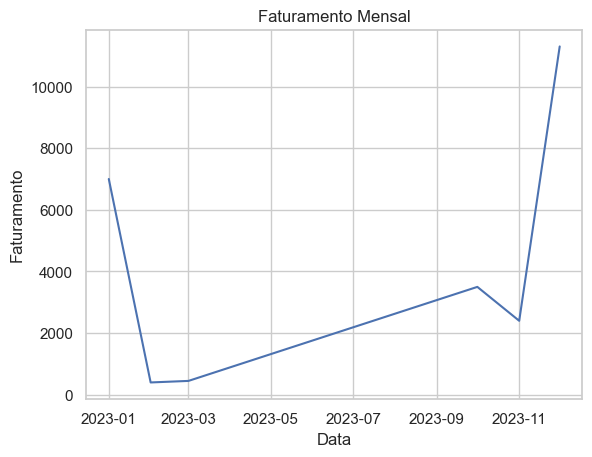

In [5]:
faturamento_mensal = (
    df
    .groupby(df['order_date'].dt.to_period('M'))['revenue']
    .sum()
    .reset_index()
)

faturamento_mensal['order_date'] = faturamento_mensal['order_date'].dt.to_timestamp()

plt.plot(faturamento_mensal['order_date'], faturamento_mensal['revenue'])
plt.title('Faturamento Mensal')
plt.xlabel('Data')
plt.ylabel('Faturamento')
plt.show()


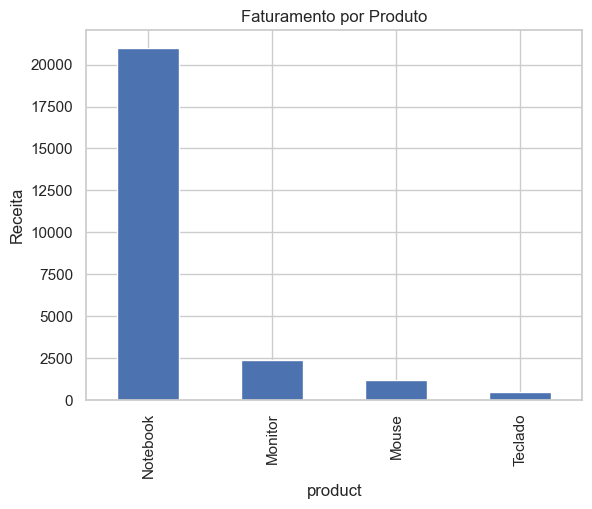

In [6]:
top_produtos = (
    df.groupby('product')['revenue']
    .sum()
    .sort_values(ascending=False)
)

top_produtos.plot(kind='bar')
plt.title('Faturamento por Produto')
plt.ylabel('Receita')
plt.show()


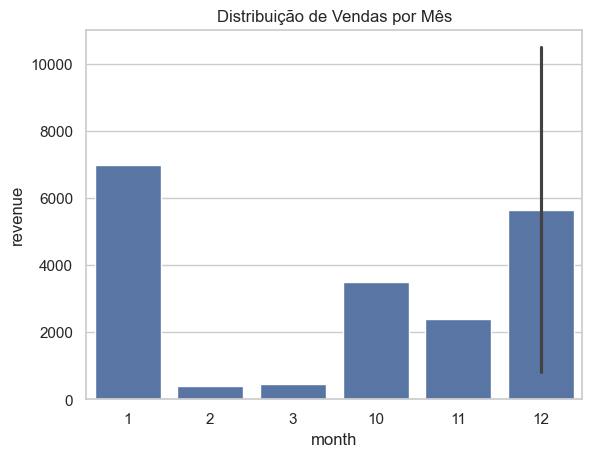

In [7]:
df['month'] = df['order_date'].dt.month

sns.barplot(x=df['month'], y=df['revenue'])
plt.title('Distribuição de Vendas por Mês')
plt.show()


## Insights

- Observa-se aumento significativo nas vendas no último trimestre do ano
- O produto Notebook é o principal responsável pelo faturamento
- Dezembro apresenta o maior volume de vendas
